## 폰트 설정, wordcloud 패키지 설치

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install wordcloud

## txt 파일 시각화

In [ ]:
from wordcloud import WordCloud
text =open('/content/drive/MyDrive/fly_ai/2주차/alice.txt').read()
text

## 빈도 계산

In [ ]:
wordcloud = WordCloud().generate(text)
wordcloud
wordcloud.words_

## 워드클라우드 생성

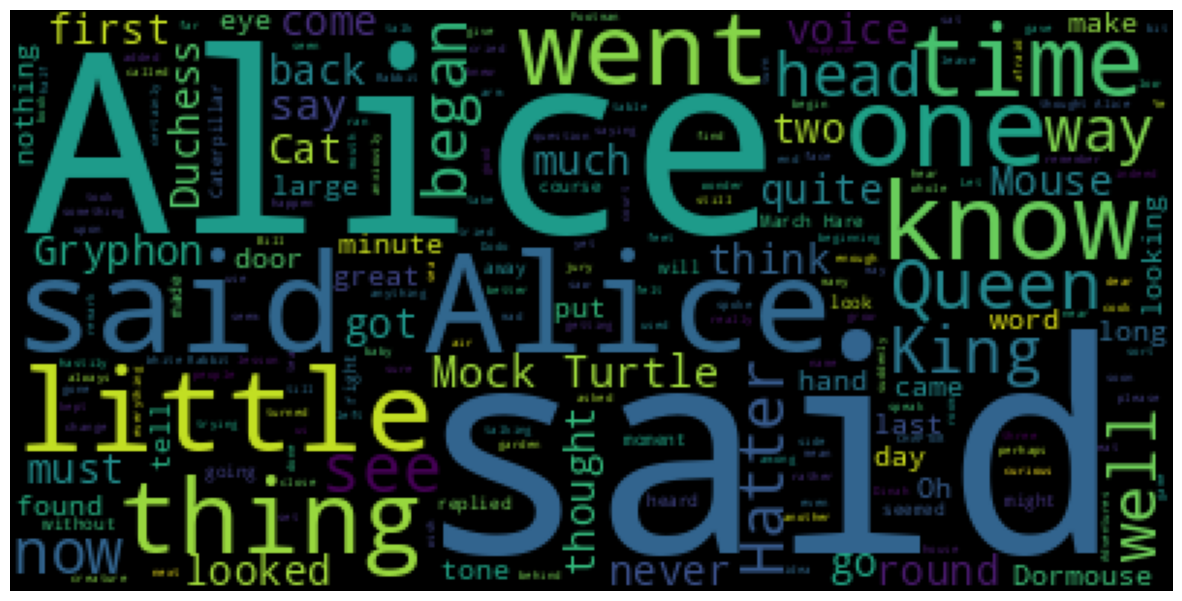

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 글자수 제한

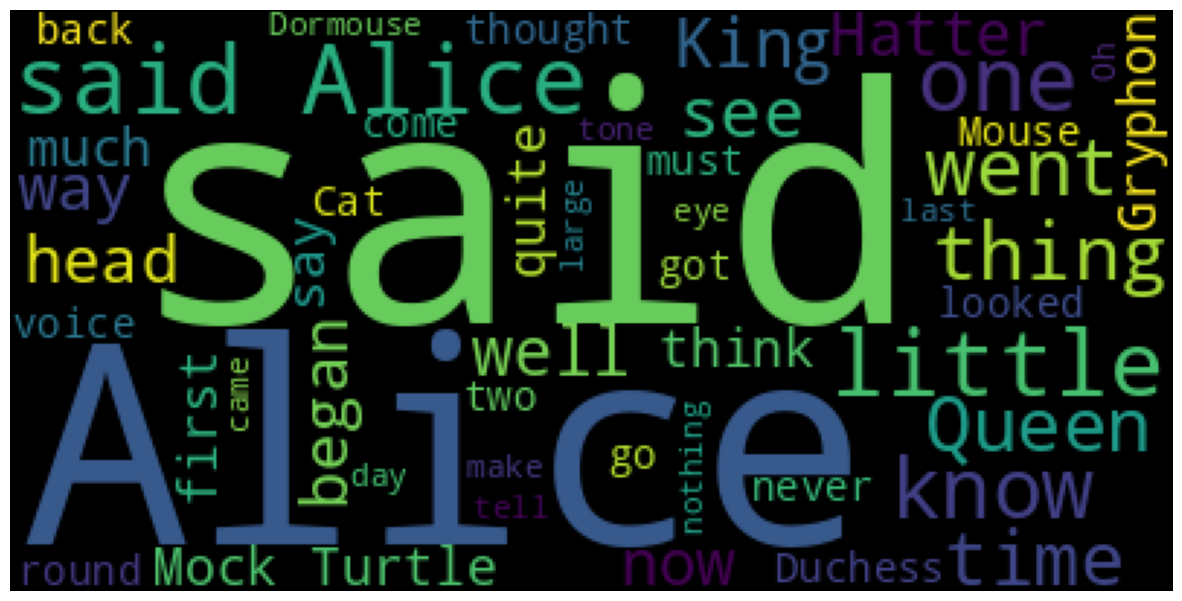

In [26]:
wordcloud = WordCloud(max_words = 50).generate(text)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 불용어 처리

In [ ]:
from wordcloud import STOPWORDS
STOPWORDS

In [28]:
type(STOPWORDS)

set

In [33]:
STOPWORDS.add('said')
print(STOPWORDS)

{'her', 'should', 'through', 'same', 'having', 'however', 'http', "i'd", 'our', 'it', 'that', "she's", 'themselves', 'then', 'theirs', 'been', 'both', 'before', 'your', 'of', 'when', "you'd", "shan't", "can't", 'yourself', 'me', 'yours', "won't", 'has', 'them', 'again', 'itself', 'who', 'be', 'there', 'ever', 'whom', 'shall', 'therefore', 'own', 'we', "we'd", "what's", 'what', "doesn't", 'because', 'how', 'below', 'my', "shouldn't", 'could', 'his', "hasn't", 'hence', 'also', "we've", "you've", "they're", "there's", 'about', 'under', 'www', 'no', "couldn't", "wasn't", 'once', "she'd", 'an', 'yourselves', "he'd", 'until', 'if', "that's", 'ourselves', 'those', 'solt', 'him', 'out', "he'll", 'was', "we're", 'after', 'would', "they'd", 'were', 'you', "you'll", "it's", "i'm", 'these', "mustn't", "didn't", 'than', 'not', 'more', 'hers', 'is', 'between', 'its', 'down', 'nor', 'up', 'just', 'at', 'i', 'ours', 'com', 'very', 'for', "when's", 'had', 'and', "how's", 'himself', "why's", "haven't", 

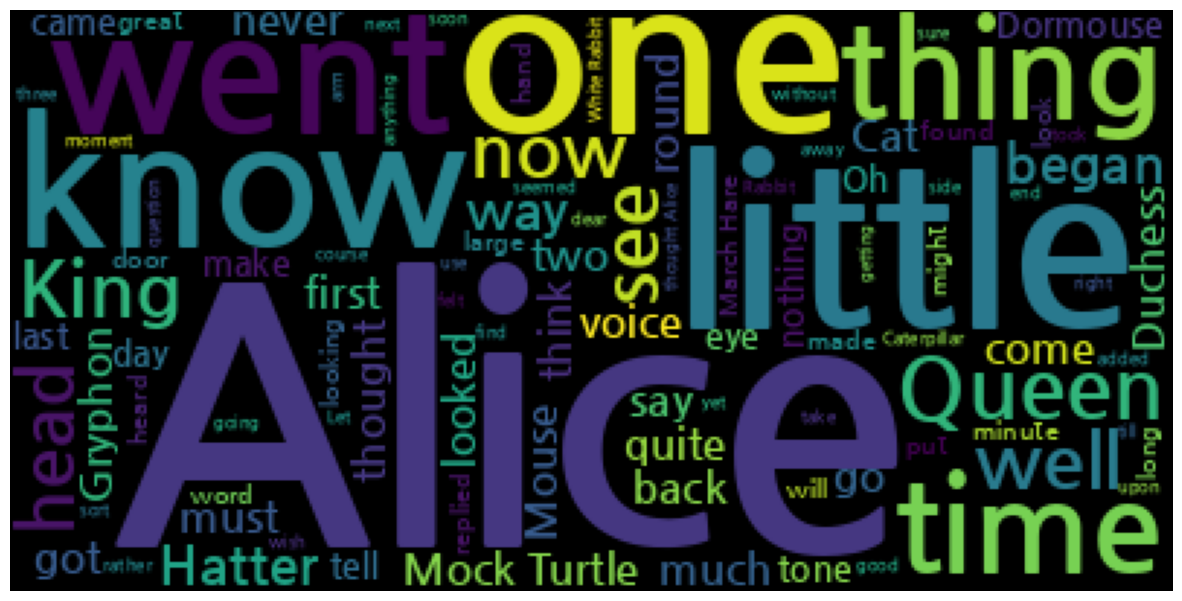

In [38]:
wordcloud = WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',stopwords=STOPWORDS).generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 마스크를 이용한 시각화

In [37]:
from PIL import Image
import numpy as np

In [48]:
word_mask = np.array(Image.open('/content/검정트리.png'))
word_mask

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

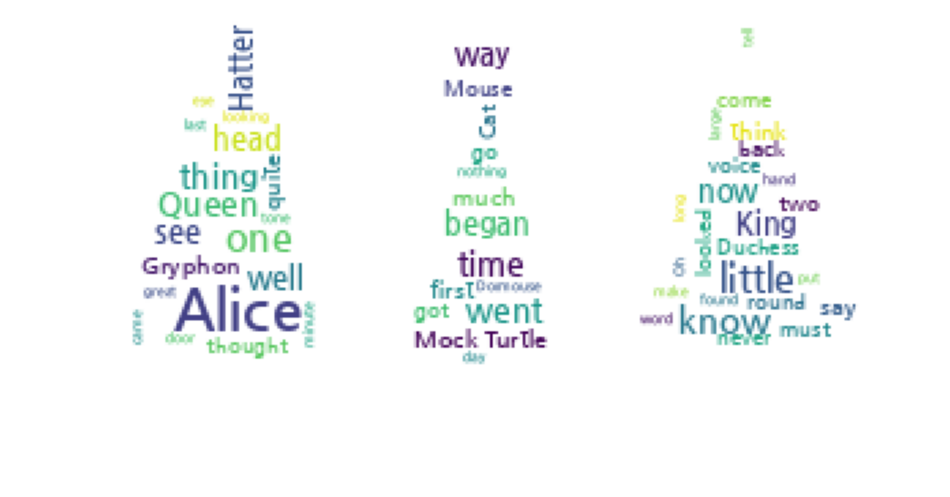

In [52]:
wordcloud=WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',stopwords=STOPWORDS, mask=word_mask, background_color='white').generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 크롤링으로 워드클라우드

In [53]:
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
from bs4 import BeautifulSoup
import requests
import time

In [62]:
questions = []

In [66]:
questions2 = []

In [67]:
for i in range(1, 30):
#페이지네이션 적용
  res = requests.get("https://qna.programmers.co.kr/?page={}".format(i), user_agent)
  soup = BeautifulSoup(res.text, "html.parser")
  ul_tags = soup.find_all("ul", "question-tags")
  for ul in ul_tags:
    li_tags = ul.find_all("li")
    for li in li_tags:
      #빈칸이 너무많아 strip()으로 처리
      questions2.append(li.text.strip())

  time.sleep(0.5)

In [90]:
result = " ".join(questions2)

In [ ]:
questions
questions2

In [ ]:
# 횟수를 기반으로 딕셔너리 생성
from collections import Counter
# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum
words = []
hannanum = Hannanum()
#문장이 아니라 지금은 리스트이기 때문에 for문을 돌면서 각각의 형태소를 분석.
for question in questions2:
 nouns = hannanum.nouns(question) #한 번 반복할 때 나오는 명사들
 words += nouns #word에 누적.

# counter를 이용해 각 단어의 개수.
counter = Counter(words)
counter

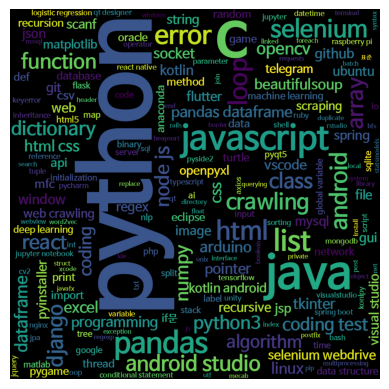

In [93]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000
).generate(result)
# img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(wordcloud)

In [82]:
img_path = '/content/drive/MyDrive/fly_ai/2주차/alice.png'

word_mask = np.array(Image.open(img_path))
word_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

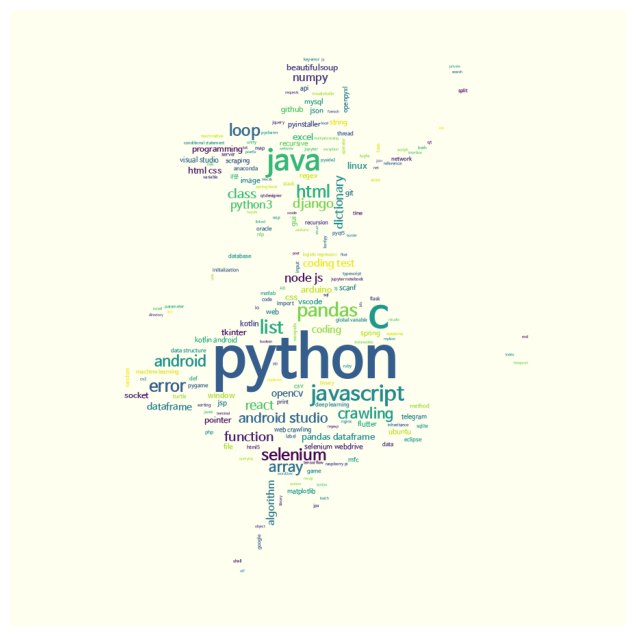

In [94]:
wordcloud = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000,
 mask=word_mask,
 background_color='ivory'
).generate(result)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 기사 크롤링 후 워드클라우드(팀 과제)

In [9]:
import requests
from bs4 import BeautifulSoup as bs

In [3]:
from wordcloud import WordCloud

In [4]:
url_path = 'https://www.joongang.co.kr/article/25217462#home'

In [5]:
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML,like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [10]:
res = requests.get(url_path, user_agent)
soup = bs(res.text, "html.parser")
content = soup.find_all("article")
result = []
for data in content:
  result.append(data.text)

In [11]:
result

["\n\n\n\n\n사회\n사회일반\n\n\n이재용·홍진영 결혼? 이런 황당 가짜뉴스 퍼뜨린 유튜버 최후\n\n\n중앙일보\n\n입력\n\n\n업데이트\n\n\n\n업데이트 정보 더보기\n\n\n\n\n\n\n앱에서 읽기\n\n\n\n\n한지혜\n기자\xa0\n\n구독\n\n\n\n\n정치권, 재계, 연예계 등을 가리지 않고 가짜뉴스를 무차별적으로 퍼뜨린 유튜브 채널이 당국의 경고에 결국 삭제됐다.\n윤석열 대통령은 9월 22일 뉴욕 디지털 비전 포럼에서 “가짜뉴스 확산을 방지하지 못한다면 자유 민주주의가 위협받는다”고 말했다. 중앙포토\n   26일 유튜브에 따르면 가짜뉴스의 진원으로 지목된 유튜브 채널 '퓨리 크리에이터(FuRi Creator)'는 업로드됐던 모든 영상이 삭제된 채 '이슈파인드'이라는 다른 계정으로 연결된다.\n   이 채널은 정치권, 재계, 연예계 등과 관련한 가짜뉴스를 길이가 짧은 숏폼콘텐트로 만들어 유포해왔다. 구독자 수는 약 5만4000명을 넘었다.\n   주요 영상은 '윤석열 대통령이 연설 도중 막걸리병에 맞아 분노했다', '이재용 삼성전자 회장과 가수 홍진영이 결혼한다', '정치인 이준석의 결혼에 박근혜 전 대통령이 축의금 1억5000만 원을 냈다'는 등 터무니없는 소재들로 만들어졌다. 또 유명인이 이혼했다거나 위독한 상태라는 내용도 쉽게 찾아볼 수 있었지만, 이는 모두 가짜뉴스였다.\n\n   영상엔 유명인의 실명 등이 그대로 노출된 경우가 대부분이어서 명예훼손 등의 피해 우려가 큰 상황이었다.\n   이에 방송통신심의위원회는 통신심의소위원회를 열어 해당 채널에 대한 공식 심의를 시작하고, 필요시 삭제나 차단 등 강경한 조처를 한다는 방침을 세웠다. 다만 비판 여론에 부담을 느낀 채널 운영자는 영상을 자진 삭제하면서 사태가 일단락됐다.\n   최근 여권을 중심으로 가짜뉴스 엄단 분위기가 강화되면서 방심위도 이런 콘텐트를 무차별 퍼뜨리는 유튜브 채널에 강경한 조치를 내놓을 것으로 예상된다.\n   방심위는 지난 21일 위원장 주

In [12]:
join_result = " ".join(result)

In [13]:
join_result

"\n\n\n\n\n사회\n사회일반\n\n\n이재용·홍진영 결혼? 이런 황당 가짜뉴스 퍼뜨린 유튜버 최후\n\n\n중앙일보\n\n입력\n\n\n업데이트\n\n\n\n업데이트 정보 더보기\n\n\n\n\n\n\n앱에서 읽기\n\n\n\n\n한지혜\n기자\xa0\n\n구독\n\n\n\n\n정치권, 재계, 연예계 등을 가리지 않고 가짜뉴스를 무차별적으로 퍼뜨린 유튜브 채널이 당국의 경고에 결국 삭제됐다.\n윤석열 대통령은 9월 22일 뉴욕 디지털 비전 포럼에서 “가짜뉴스 확산을 방지하지 못한다면 자유 민주주의가 위협받는다”고 말했다. 중앙포토\n   26일 유튜브에 따르면 가짜뉴스의 진원으로 지목된 유튜브 채널 '퓨리 크리에이터(FuRi Creator)'는 업로드됐던 모든 영상이 삭제된 채 '이슈파인드'이라는 다른 계정으로 연결된다.\n   이 채널은 정치권, 재계, 연예계 등과 관련한 가짜뉴스를 길이가 짧은 숏폼콘텐트로 만들어 유포해왔다. 구독자 수는 약 5만4000명을 넘었다.\n   주요 영상은 '윤석열 대통령이 연설 도중 막걸리병에 맞아 분노했다', '이재용 삼성전자 회장과 가수 홍진영이 결혼한다', '정치인 이준석의 결혼에 박근혜 전 대통령이 축의금 1억5000만 원을 냈다'는 등 터무니없는 소재들로 만들어졌다. 또 유명인이 이혼했다거나 위독한 상태라는 내용도 쉽게 찾아볼 수 있었지만, 이는 모두 가짜뉴스였다.\n\n   영상엔 유명인의 실명 등이 그대로 노출된 경우가 대부분이어서 명예훼손 등의 피해 우려가 큰 상황이었다.\n   이에 방송통신심의위원회는 통신심의소위원회를 열어 해당 채널에 대한 공식 심의를 시작하고, 필요시 삭제나 차단 등 강경한 조처를 한다는 방침을 세웠다. 다만 비판 여론에 부담을 느낀 채널 운영자는 영상을 자진 삭제하면서 사태가 일단락됐다.\n   최근 여권을 중심으로 가짜뉴스 엄단 분위기가 강화되면서 방심위도 이런 콘텐트를 무차별 퍼뜨리는 유튜브 채널에 강경한 조치를 내놓을 것으로 예상된다.\n   방심위는 지난 21일 위원장 주재

In [129]:
wordcloud = WordCloud().generate(join_result)
wordcloud
wordcloud.words_

{'더 중앙': 1.0,
 '중앙 플러스': 1.0,
 '가짜뉴스': 0.5,
 '더': 0.4,
 '이재용': 0.3,
 '이런': 0.3,
 '유튜브': 0.3,
 '윤석열': 0.3,
 '이': 0.3,
 '수': 0.3,
 '딱': 0.3,
 '홍진영': 0.2,
 '결혼': 0.2,
 '퍼뜨린': 0.2,
 '최후': 0.2,
 '업데이트': 0.2,
 '한지혜': 0.2,
 '기자': 0.2,
 '정치권': 0.2,
 '재계': 0.2,
 '연예계': 0.2,
 '가짜뉴스를': 0.2,
 '채널': 0.2,
 '대통령이': 0.2,
 '박근혜': 0.2,
 '등': 0.2,
 '실명': 0.2,
 '채널에': 0.2,
 '대한': 0.2,
 '강경한': 0.2,
 '엄단': 0.2,
 '무차별': 0.2,
 '콘텐트': 0.2,
 '에': 0.2,
 '보러': 0.2,
 '건설사': 0.2,
 '미': 0.2,
 '엄마': 0.2,
 '남자의': 0.2,
 '턱': 0.2,
 '그': 0.2,
 '두둥': 0.2,
 '사회': 0.1,
 '사회일반': 0.1,
 '황당': 0.1,
 '유튜버': 0.1,
 '중앙일보': 0.1,
 '입력': 0.1,
 '정보': 0.1,
 '더보기': 0.1,
 '앱에서': 0.1,
 '읽기': 0.1,
 '구독': 0.1,
 '등을': 0.1,
 '가리지': 0.1,
 '않고': 0.1,
 '무차별적으로': 0.1,
 '채널이': 0.1,
 '당국의': 0.1,
 '경고에': 0.1,
 '결국': 0.1,
 '삭제됐다': 0.1,
 '대통령은': 0.1,
 '9월': 0.1,
 '22일': 0.1,
 '뉴욕': 0.1,
 '디지털': 0.1,
 '비전': 0.1,
 '포럼에서': 0.1,
 '확산을': 0.1,
 '방지하지': 0.1,
 '못한다면': 0.1,
 '자유': 0.1,
 '민주주의가': 0.1,
 '위협받는다': 0.1,
 '고': 0.1,
 '말했다': 0.1,
 '중앙포토': 0.1,
 '26일':

In [48]:
from konlpy.corpus import kobill
from konlpy.tag import Okt

stopwords = ["더 중앙", "중앙 플러스", "더", "중앙일보", "의", "를", "는", "가", "에", "이", "을", "중앙", "플러스", "으로", "에서", "은", "등", "로", "도"]

okt = Okt()

tokens = okt.morphs(join_result)
filtered_tokens = [word for word in tokens if word not in stopwords]

print(filtered_tokens)


['\n\n\n\n\n', '사회', '\n', '사회', '일반', '\n\n\n', '이재용', '·', '홍진영', '결혼', '?', '이런', '황당', '가짜', '뉴스', '퍼뜨린', '유튜버', '최후', '\n\n\n', '일보', '\n\n', '입력', '\n\n\n', '업데이트', '\n\n\n\n', '업데이트', '정보', '보기', '\n\n\n\n\n\n\n', '앱', '읽기', '\n\n\n\n\n', '한지혜', '\n', '기자', '\xa0', '\n\n', '구독', '\n\n\n\n\n', '정치권', ',', '재계', ',', '연예계', '가리지', '않고', '가짜', '뉴스', '무차별', '적', '퍼뜨린', '유튜브', '채널', '당국', '경고', '결국', '삭제', '됐다', '.', '\n', '윤석열', '대통령', '9월', '22일', '뉴욕', '디지털', '비전', '포럼', '“', '가짜', '뉴스', '확산', '방지', '하지', '못', '한다면', '자유', '민주주의', '위협', '받는다', '”', '고', '말', '했다', '.', '포토', '\n   ', '26일', '유튜브', '따르면', '가짜', '뉴스', '진원', '지목', '된', '유튜브', '채널', "'", '퓨리', '크리에이터', '(', 'FuRi', 'Creator', ")'", '업로드', '됐던', '모든', '영상', '삭제', '된', '채', "'", '이슈', '파인', '드', "'", '이라는', '다른', '계정', '연결', '된다', '.', '\n   ', '채널', '정치권', ',', '재계', ',', '연예계', '과', '관련', '한', '가짜', '뉴스', '길이', '짧은', '숏폼', '콘텐트', '만들어', '유포', '해왔다', '.', '구', '독자', '수', '약', '5만', '4000', '명', '넘었다', '.', '\n   ', '주요

In [49]:
stop_result = " ".join(filtered_tokens)
stop_result

"\n\n\n\n\n 사회 \n 사회 일반 \n\n\n 이재용 · 홍진영 결혼 ? 이런 황당 가짜 뉴스 퍼뜨린 유튜버 최후 \n\n\n 일보 \n\n 입력 \n\n\n 업데이트 \n\n\n\n 업데이트 정보 보기 \n\n\n\n\n\n\n 앱 읽기 \n\n\n\n\n 한지혜 \n 기자 \xa0 \n\n 구독 \n\n\n\n\n 정치권 , 재계 , 연예계 가리지 않고 가짜 뉴스 무차별 적 퍼뜨린 유튜브 채널 당국 경고 결국 삭제 됐다 . \n 윤석열 대통령 9월 22일 뉴욕 디지털 비전 포럼 “ 가짜 뉴스 확산 방지 하지 못 한다면 자유 민주주의 위협 받는다 ” 고 말 했다 . 포토 \n    26일 유튜브 따르면 가짜 뉴스 진원 지목 된 유튜브 채널 ' 퓨리 크리에이터 ( FuRi Creator )' 업로드 됐던 모든 영상 삭제 된 채 ' 이슈 파인 드 ' 이라는 다른 계정 연결 된다 . \n    채널 정치권 , 재계 , 연예계 과 관련 한 가짜 뉴스 길이 짧은 숏폼 콘텐트 만들어 유포 해왔다 . 구 독자 수 약 5만 4000 명 넘었다 . \n    주요 영상 ' 윤석열 대통령 연설 도중 막걸리 병 맞아 분노했다 ', ' 이재용 삼성 전자 회장 과 가수 홍진영 결혼 한다 ', ' 정치인 이준석 결혼 박근혜 전 대통령 축의금 1억 5000만 원 냈다 ' 터 무니 없는 소재 들 만들어졌다 . 또 유명인 이혼 했다거나 위독한 상태 라는 내용 쉽게 찾아볼 수 있었지만 , 이는 모두 가짜 뉴스 였다 . \n\n    영상 엔 유명인 실명 그대로 노출 된 경우 대부분 이어서 명예훼손 피해 우려 큰 상황 이었다 . \n    방송통신 심의 위원회 통신 심의 소 위원회 열어 해당 채널 대한 공식 심의 시작 하고 , 필요시 삭제 나 차단 강경한 조처 한다는 방침 세웠다 . 다만 비판 여론 부담 느낀 채널 운영자 영상 자진 삭제 하면서 사태 일단락 됐다 . \n    최근 여권 중심 가짜 뉴스 엄단 분위기 강화 되면서 방심위 이런 콘텐트 무차별 퍼뜨리 유튜브 채널 강경한 조

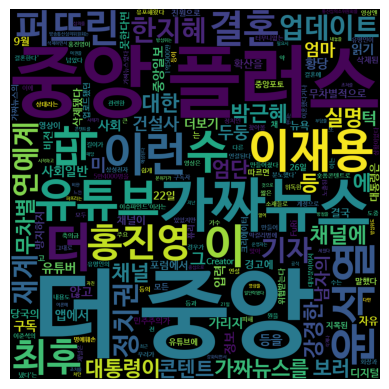

In [23]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000
).generate(join_result)
# img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(wordcloud)

### 불용어 적용

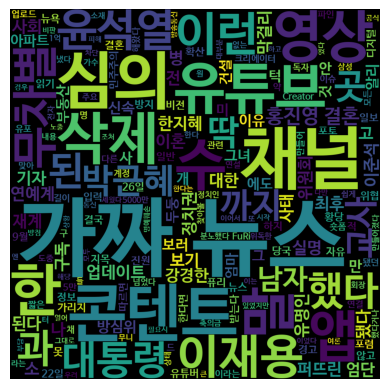

In [50]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000,
).generate(stop_result)
# img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(wordcloud)

In [40]:
import numpy as np
from PIL import Image

In [44]:
word_mask = np.array(Image.open('/content/이재용.png'))
word_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

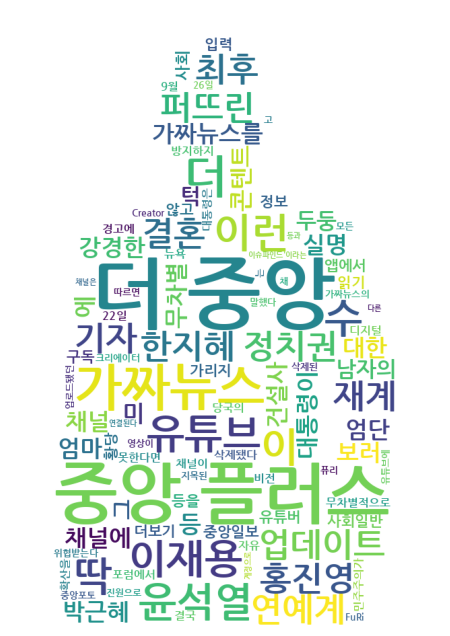

In [46]:
wordcloud=WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', mask=word_mask, background_color='white').generate(join_result)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

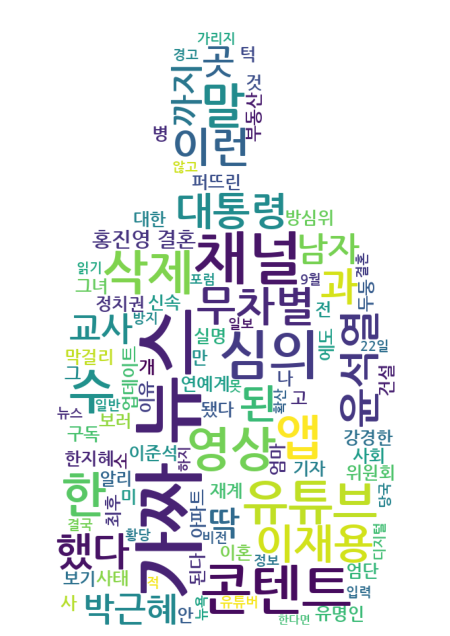

In [51]:
wordcloud=WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', mask=word_mask, background_color='white').generate(stop_result)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 멜론차트 크롤링 시각화

In [57]:
from bs4 import BeautifulSoup as bs
import requests as req
import pandas as pd
# header 만들기
url = 'https://www.melon.com/chart/index.htm'
header = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36(KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36'}
# 헤더 확인
res =req.get(url, headers=header)
res
#파이선 객체 데이터로 변환
html = bs(res.text,'lxml')
html

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/index.htm" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" propert

In [73]:
singer = html.select('.ellipsis.rank02>span>a')
singer_list=[i.text for i in singer]
singer_list

['EXO',
 'LE SSERAFIM (르세라핌)',
 'aespa',
 '태연 (TAEYEON)',
 'Mariah Carey',
 '임영웅',
 'Sia',
 'IVE (아이브)',
 '성시경',
 '박효신',
 '이석훈',
 '서인국',
 'VIXX (빅스)',
 '정국',
 '임영웅',
 '박재정',
 'Ariana Grande',
 '임영웅',
 '임영웅',
 '범진',
 '아이유',
 '임영웅',
 '임재현',
 '임영웅',
 'AKMU (악뮤)',
 '임영웅',
 '임영웅',
 '임영웅',
 'Ariana Grande',
 '임영웅',
 '제니 (JENNIE)',
 '정국',
 '너드커넥션 (Nerd Connection)',
 '임영웅',
 'IVE (아이브)',
 '이무진',
 'AKMU (악뮤)',
 '임영웅',
 'NewJeans',
 'NewJeans',
 '우디 (Woody)',
 '폴킴',
 '임영웅',
 'NewJeans',
 '로이킴',
 '디오 (D.O.)',
 'IVE (아이브)',
 '성시경',
 'PLAVE',
 'NewJeans',
 '(여자)아이들',
 'SG 워너비',
 '브라운아이드걸스',
 '다이나믹 듀오',
 '이영지',
 '이무진',
 '볼빨간사춘기',
 'RIIZE',
 '방탄소년단',
 'IVE (아이브)',
 '방탄소년단',
 'Kelly Clarkson',
 'Red Velvet (레드벨벳)',
 '전소미',
 '성시경',
 '나얼',
 'AKMU (악뮤)',
 '세븐틴 (SEVENTEEN)',
 'QWER',
 '임한별',
 '멜로망스',
 'Alessia Cara',
 '윤하 (YOUNHA)',
 'aespa',
 'NewJeans',
 'IVE (아이브)',
 'LE SSERAFIM (르세라핌)',
 '방탄소년단',
 'NCT 127',
 'NewJeans',
 'League of Legends',
 'DK(디셈버)',
 'Lauv',
 'IVE (아이브)',
 '김민석',
 'STAYC(스테이씨)'

In [79]:
song=html.select('.ellipsis.rank01>span>a')
song_list=[i.text for i in song]

singer = html.select('.ellipsis.rank02>span')
singer_list=[i.text for i in singer]

rank_list =[i+1 for i in range(len(song_list))]
print(len(rank_list))
print(len(singer_list))
print(len(song_list))

100
100
100


In [81]:
top_100={'순위':rank_list, '가수':singer_list, '곡명':song_list}
top_100_df=pd.DataFrame(top_100)
top_100_df

,순위,가수,곡명
0,1,EXO,첫 눈
1,2,LE SSERAFIM (르세라핌),Perfect Night
2,3,aespa,Drama
3,4,태연 (TAEYEON),To. X
4,5,Mariah Carey,All I Want for Christmas Is You
...,...,...,...
95,96,NCT 127,나 홀로 집에 (Home Alone)
96,97,부석순 (SEVENTEEN),파이팅 해야지 (Feat. 이영지)
97,98,NCT 127,Fact Check (불가사의; 不可思議)
98,99,탑현,나에게 그대만이


In [83]:
singer_list = ' '.join(singer_list)

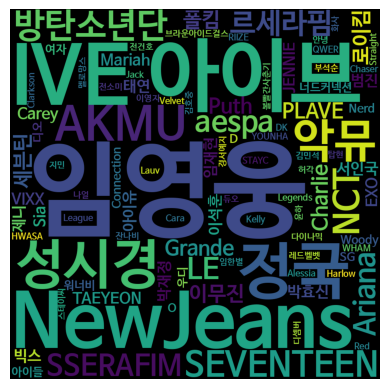

In [84]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(
 font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 height = 1000,
 width=1000
).generate(singer_list)
# img = wordcloud.generate_from_frequencies(counter)
plt.axis('off')
plt.imshow(wordcloud)

In [97]:
word_mask = np.array(Image.open('/content/노래2.png'))
word_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

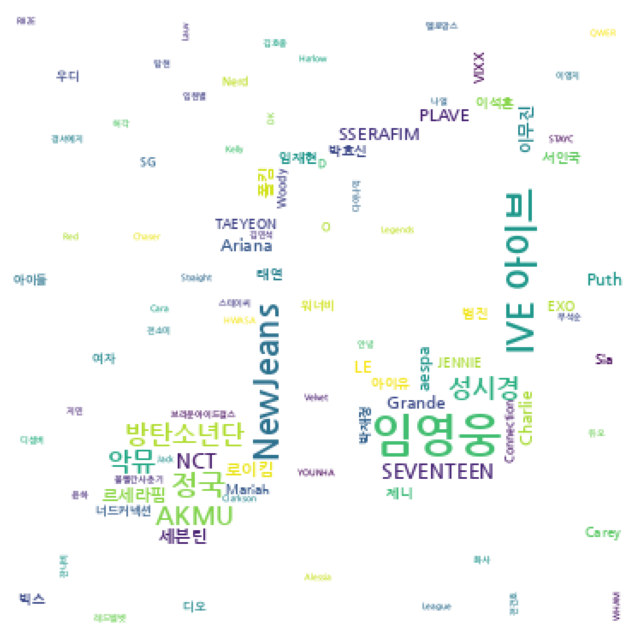

In [94]:
wordcloud=WordCloud(max_words=100,font_path='/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', mask=word_mask, background_color='white').generate(singer_list)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()